## Log Transformer...  
* Take log of every value in the column (base depends on coder... doesn't matter)
* Used when the data is right skewed (pdf meets its peak far on the left side of center)
<br><br><br>



      
![ytss](assets/logTransformer.png)

## Other Transformers
* **Reciprocal 1/x**: Reverse everything.
* **square**: take square of everything... used when data is left skewed
* **sqrt**: not that much used..

<br><br>
![yt_ss](assets/otherTransformers.png)

## Code:

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats #for the QQ Plot

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [4]:
df = pd.read_csv("assets/Titanic-Dataset.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [6]:
df['Age']= df['Age'].fillna(df['Age'].mean())

In [8]:
df.info() #no null values now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [9]:
X_train,X_test,y_train,y_test = train_test_split(df.drop("Survived",axis=1),
                                                df['Survived'],
                                                test_size=0.2,
                                                random_state=42)

In [56]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


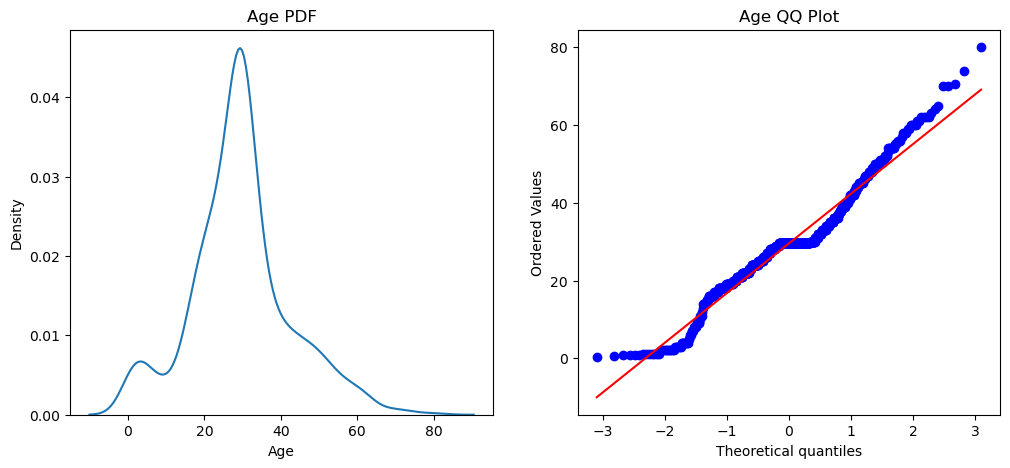

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

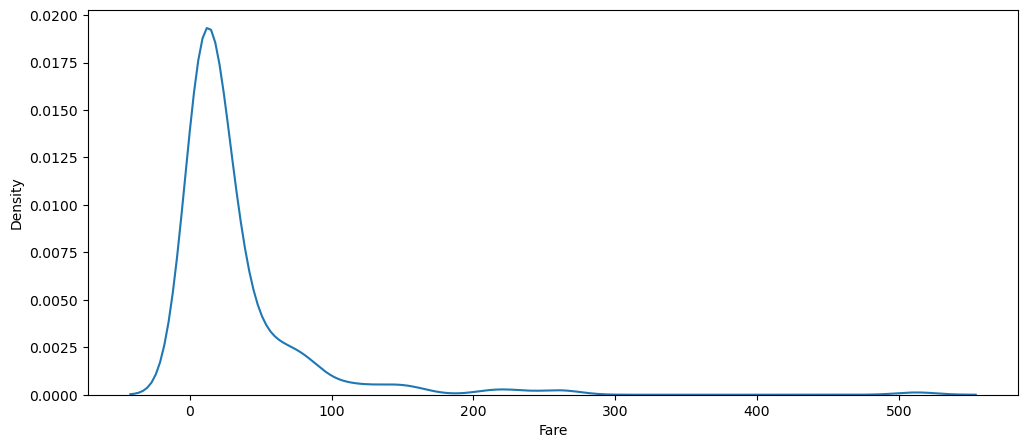

In [17]:
# imma just stick to kde now
plt.figure(figsize=(12,5))
sns.kdeplot(X_train['Fare'])
plt.show()# its right skewed, gotta use log function transformer

In [18]:
clf1 = LogisticRegression()
clf2= DecisionTreeClassifier()

In [23]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy using LogisticRegression: ",accuracy_score(y_test,y_pred1))
print("Accuracy using DecisionTree: ",accuracy_score(y_test,y_pred2))

# these are the results without using any kind of function transformer

Accuracy using LogisticRegression:  0.6480446927374302
Accuracy using DecisionTree:  0.6983240223463687


In [23]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy using LogisticRegression: ",accuracy_score(y_test,y_pred1))
print("Accuracy using DecisionTree: ",accuracy_score(y_test,y_pred2))

# these are the results without using any kind of function transformer

Accuracy using LogisticRegression:  0.6480446927374302
Accuracy using DecisionTree:  0.6983240223463687


In [25]:
# applying log function transformer

trf = FunctionTransformer(func=np.log1p)# adds 1 to every value and then takes log. avoids the risk of log of 0.

In [59]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)


In [41]:
clf1 = LogisticRegression()
clf2= DecisionTreeClassifier()

clf1.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)


y_pred1 = clf1.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

In [42]:
print("Accuracy using LogisticRegression: ",accuracy_score(y_test,y_pred1))
print("Accuracy using DecisionTree: ",accuracy_score(y_test,y_pred2))
#DecisionTree remained same but logisticRegression' accuracy improved, as expected

Accuracy using LogisticRegression:  0.6815642458100558
Accuracy using DecisionTree:  0.6871508379888268


In [44]:
X_transformed = trf.fit_transform(df.drop('Survived',axis=1))

clf1 = LogisticRegression()
clf2= DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf1,X_transformed,df['Survived'],scoring="accuracy",cv=10)))
print("DT", np.mean(cross_val_score(clf2,X_transformed,df['Survived'],scoring="accuracy",cv=10)))

LR 0.678027465667915
DT 0.6543320848938827


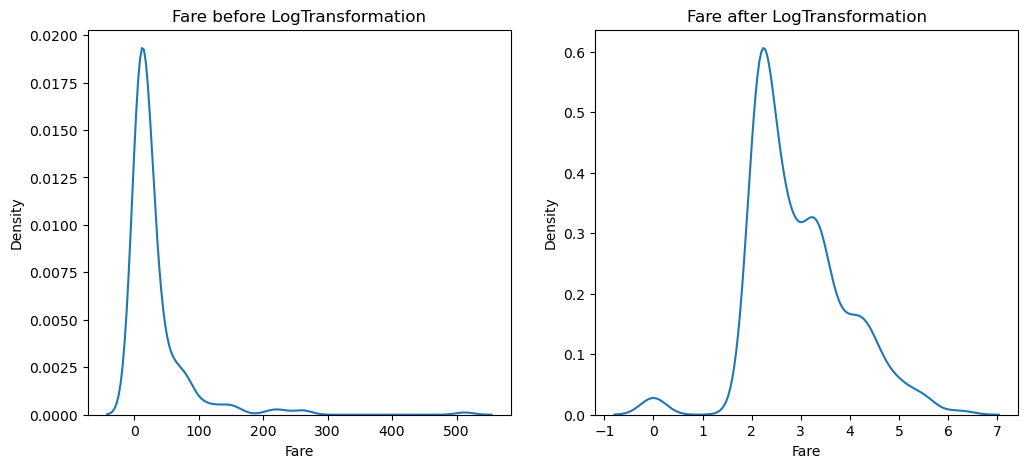

In [47]:
# Now let's compare Fare with Kde plot from before transformation and after transformation





# Noice

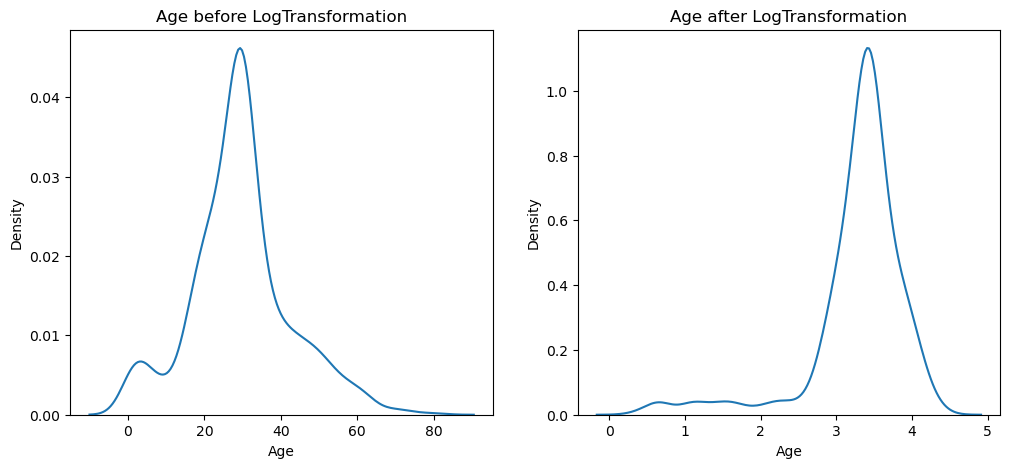

In [50]:
# now lets look at age like that.. age wasn't skewed to begin with, 


plt.figure(figsize=(12,5))
plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title('Age before LogTransformation')


plt.subplot(122)
sns.kdeplot(X_train_transformed['Age'])
plt.title('Age after LogTransformation')

plt.show()




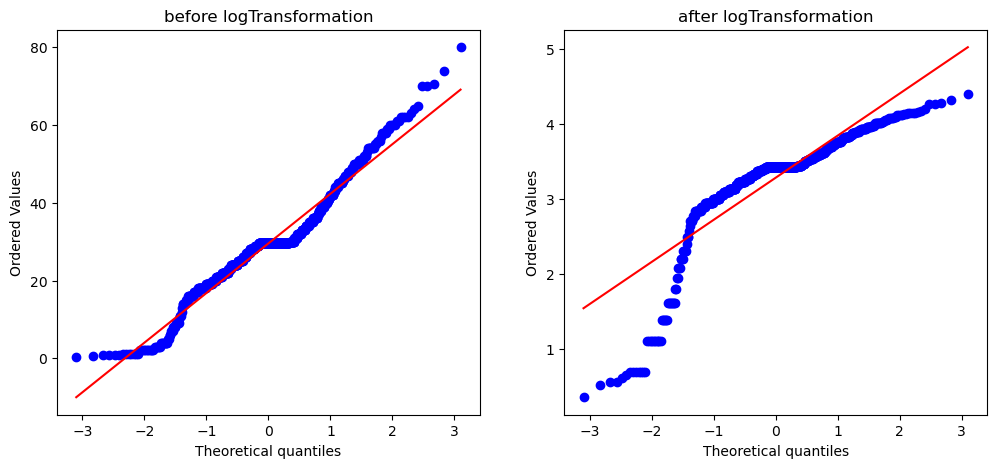

In [53]:
#it got left skewed, bad thing. lets check it with QQ plot as well

plt.figure(figsize=(12,5))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('before logTransformation')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title('after logTransformation')


plt.show()

#heck Nah. got messed up as we saw in kde plot as well

In [54]:
# Solution: only apply it on age and passthrough the age column.

In [57]:
trf= ColumnTransformer([
    ('logFare',FunctionTransformer(func=np.log1p),[1])
],remainder='passthrough')

In [60]:
X_train_transformed2 = trf.fit_transform(X_train)
X_test_transformed2 = trf.transform(X_test)

In [61]:
clf1 = LogisticRegression()
clf2= DecisionTreeClassifier()

clf1.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred1 = clf1.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)


print('LR: ',accuracy_score(y_test,y_pred1))
print('DT: ',accuracy_score(y_test,y_pred2))

LR:  0.6703910614525139
DT:  0.6703910614525139


#### check out following notebook for other tranformations like reciprocal, or log
[github_repo_file](https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day30-function-transformer/day30.ipynb)